<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
from bs4 import BeautifulSoup
import requests


In [3]:
# read in data
doc = pd.read_csv('data/job_listings.csv')

In [4]:
# inspect the data
doc.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [5]:
# extract a string to test beautiful soup
string = doc['description'][0]
string

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [6]:
# soup test
soup_test = BeautifulSoup(doc['description'][0], 'html.parser')

print(soup_test.prettify())

b"
<div>
 <div>
  Job Requirements:
 </div>
 <ul>
  <li>
   <p>
    \nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them
   </p>
   \n
  </li>
  <li>
   <p>
    Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)
   </p>
   \n
  </li>
  <li>
   <p>
    Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R
   </p>
   \n
  </li>
  <li>
   <p>
    Ability to communicate Model findings to both Technical and Non-Technical stake holders
   </p>
   \n
  </li>
  <li>
   <p>
    Hands on experience in SQL/Hive or similar programming language
   </p>
   \n
  </li>
  <li>
   <p>
    Must show past work via GitHub, Kaggle or any other published article
   </p>
   \n
  </li>
  <

In [7]:
# extract the text
soup_test_text = soup_test.get_text()
print(soup_test_text)

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [8]:
soup_test_2 = BeautifulSoup(doc['description'][0], 'html.parser').get_text()
print(soup_test_2)

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [9]:
# create a function that creates a new column with the text
 
#for x in doc['description']: 

def does_a_thing(x):
    return BeautifulSoup(x, 'html.parser').get_text()

doc['soup_text'] = [does_a_thing(x) for x in doc['description']]

In [10]:
doc.head()

,Unnamed: 0,description,title,soup_text
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


In [11]:
def clean(x):
    #drop columns I do not want
    x = x.drop(['Unnamed: 0', 'description'], axis=1)
    
    return x

In [12]:
doc_clean = clean(doc)
doc_clean.head()

,title,soup_text
0,Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


## 2) Use Spacy to tokenize the listings 

In [13]:
# import spacy 
import spacy
from spacy.tokenizer import Tokenizer

In [14]:
# instantiate the object

nlp = spacy.load('en_core_web_lg')
tokenizer = Tokenizer(nlp.vocab)

In [15]:
tokens = []
for doc in tokenizer.pipe(doc_clean['soup_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
    
doc_clean['spacy_tokens'] = tokens
doc_clean.head()

,title,soup_text,spacy_tokens
0,Data scientist,"b""Job Requirements:\nConceptual understanding ...","[b""Job, Requirements:\nConceptual, understandi..."
1,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","[b'Job, Description\n\nAs, a, Data, Scientist,..."
2,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[b'As, a, Data, Scientist, you, will, be, work..."
3,Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, -, $6,756, a, monthContractUnder, t..."
4,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,"[b'Location:, USA, \xe2\x80\x93, multiple, loc..."


In [17]:
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter() # appears in will only count occurances, not total count

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc)) # set makes it occurances (oh many reviews contained a word)

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank') 

In [19]:
wc = count(doc_clean['spacy_tokens'])
print(wc.shape)
wc.head()

(23458, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
36,and,425,11477,1.0,0.058473,0.058473,0.997653
69,to,422,6736,2.0,0.034319,0.092792,0.990610
379,the,414,4931,3.0,0.025123,0.117915,0.971831
35,of,420,4532,4.0,0.023090,0.141005,0.985915
81,in,421,3436,5.0,0.017506,0.158511,0.988263


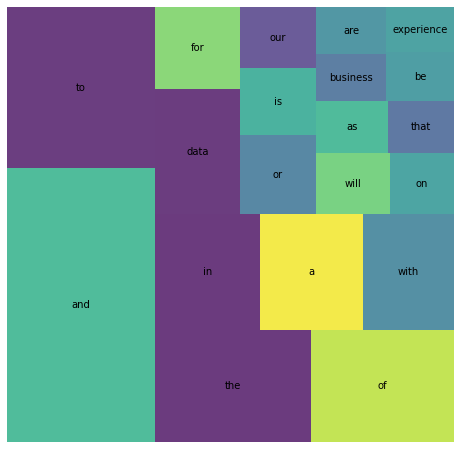

In [20]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [21]:
# Spacy's Default Stop Words
# Bruno claims this is not recommended at work
STOP_WORDS = nlp.Defaults.stop_words.union([' '])
STOP_WORDS

{' ',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',


In [22]:
# loss the stop words
tokens = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(doc_clean['soup_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.like_num == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

doc_clean['spacy_tokens_v2'] = tokens
doc_clean.head()

,title,soup_text,spacy_tokens,spacy_tokens_v2
0,Data scientist,"b""Job Requirements:\nConceptual understanding ...","[b""Job, Requirements:\nConceptual, understandi...","[b""job, requirements:\nconceptual, understandi..."
1,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","[b'Job, Description\n\nAs, a, Data, Scientist,...","[b'job, description\n\nas, data, scientist, he..."
2,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[b'As, a, Data, Scientist, you, will, be, work...","[b'as, data, scientist, working, consulting, b..."
3,Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, -, $6,756, a, monthContractUnder, t...","[b'$4,969, $6,756, monthcontractunder, general..."
4,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,"[b'Location:, USA, \xe2\x80\x93, multiple, loc...","[b'location:, usa, \xe2\x80\x93, multiple, loc..."


In [23]:
# Use the Function
wc = count(doc_clean['spacy_tokens_v2'])
print(wc.shape)
wc.head()

(21186, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
41,data,419,3751,1.0,0.030075,0.030075,0.983568
200,business,303,1008,2.0,0.008082,0.038157,0.711268
35,experience,357,941,3.0,0.007545,0.045702,0.838028
7,work,326,876,4.0,0.007024,0.052726,0.765258
73,team,314,726,5.0,0.005821,0.058547,0.737089


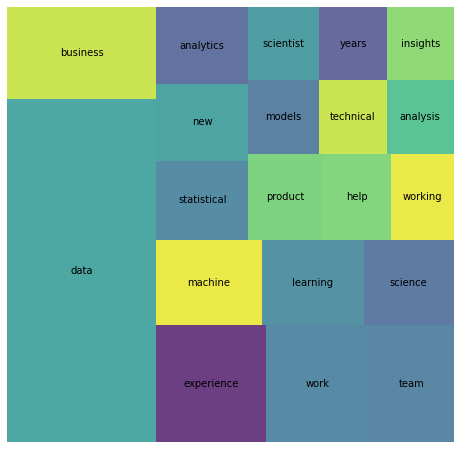

In [24]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [34]:
corpus = doc_clean['spacy_tokens_v2'].tolist()
corpus

[['b"job',
  'requirements:\\nconceptual',
  'understanding',
  'machine',
  'learning',
  'models',
  'like',
  'nai\\xc2\\xa8ve',
  'bayes,',
  'k-means,',
  'svm,',
  'apriori,',
  'linear/',
  'logistic',
  'regression,',
  'neural,',
  'random',
  'forests,',
  'decision',
  'trees,',
  'k-nn',
  'hands-on',
  'experience',
  'them\\nintermediate',
  'expert',
  'level',
  'coding',
  'skills',
  'python/r.',
  '(ability',
  'write',
  'functions,',
  'clean',
  'efficient',
  'data',
  'manipulation',
  'mandatory',
  'role)\\nexposure',
  'packages',
  'like',
  'numpy,',
  'scipy,',
  'pandas,',
  'matplotlib',
  'etc',
  'python',
  'ggplot2,',
  'dplyr,',
  'tidyr',
  'r\\nability',
  'communicate',
  'model',
  'findings',
  'technical',
  'non-technical',
  'stake',
  'holders\\nhands',
  'experience',
  'sql/hive',
  'similar',
  'programming',
  'language\\nmust',
  'past',
  'work',
  'github,',
  'kaggle',
  'published',
  "article\\nmaster's",
  'degree',
  'statistics

In [36]:
import itertools
corpus = list(itertools.chain.from_iterable(corpus))

In [31]:
doc_clean['spacy_tokens_v2'].head()

0    [b"job, requirements:\nconceptual, understandi...
1    [b'job, description\n\nas, data, scientist, he...
2    [b'as, data, scientist, working, consulting, b...
3    [b'$4,969, $6,756, monthcontractunder, general...
4    [b'location:, usa, \xe2\x80\x93, multiple, loc...
Name: spacy_tokens_v2, dtype: object

In [37]:
# create the transformer
vect = CountVectorizer()

# build vocab
vect.fit(corpus)

#transform text
dtm = vect.transform(corpus)


In [38]:
type(dtm.todense())

numpy.matrix

In [39]:
print(dtm)

  (0, 4234)	1
  (1, 5382)	1
  (1, 7855)	1
  (2, 9340)	1
  (3, 4618)	1
  (4, 4422)	1
  (5, 4937)	1
  (6, 4493)	1
  (7, 5121)	1
  (7, 9882)	1
  (7, 9896)	1
  (8, 856)	1
  (9, 4761)	1
  (10, 8867)	1
  (11, 603)	1
  (12, 4504)	1
  (13, 4560)	1
  (14, 7734)	1
  (15, 5627)	1
  (16, 7596)	1
  (17, 3190)	1
  (18, 2066)	1
  (19, 9235)	1
  (20, 6025)	1
  (21, 3559)	1
  :	:
  (124696, 509)	1
  (124697, 4690)	1
  (124698, 8672)	1
  (124699, 9533)	1
  (124700, 8672)	1
  (124701, 366)	1
  (124702, 2282)	1
  (124703, 7275)	1
  (124704, 3380)	1
  (124705, 3950)	1
  (124706, 1380)	1
  (124707, 8672)	1
  (124708, 8284)	1
  (124709, 8285)	1
  (124710, 6825)	1
  (124711, 3362)	1
  (124712, 3797)	1
  (124713, 4437)	1
  (124714, 7465)	1
  (124715, 1225)	1
  (124716, 1266)	1
  (124717, 7475)	1
  (124718, 2443)	1
  (124718, 3247)	1
  (124719, 9759)	1


In [40]:
type(dtm)

scipy.sparse.csr.csr_matrix

## 4) Visualize the most common word counts

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [41]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,00,000,02115,03,0356,04,062,08,10,100,...,yrs,zenreach,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


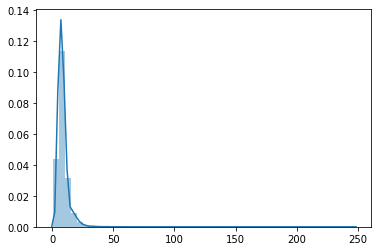

In [44]:
doc_len = [len(doc) for doc in corpus]
import seaborn as sns

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(corpus)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(124720, 5000)


,000,04,10,100,1079302,11,12,125,15,17,...,years,yearthe,yes,yeti,york,young,yrs,zeus,zf,zillow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
def tokenize(document):
    
    doc = nlp(document, disable=['tagger', 'parser'])
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [49]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.5,
                        min_df=5,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(corpus) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(124720, 2516)


,$,+,1,10,100,2,2 +,2019,3,3 +,...,you\'ll,you\xe2\x80\x99ll,you\xe2\x80\x99re,you\xe2\x80\x99ve,young,yr,zf,zillow,|,||
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 